In [49]:
import os
import re
import pandas as pd
import nilearn as nl
import numpy as np
import seaborn as sns
from nilearn.input_data import NiftiMasker
from nilearn.image.image import mean_img
from nilearn import plotting, image
from nilearn.plotting import view_img
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from nilearn.image import math_img
import time
import multiprocessing
import tqdm






# TSNR


In [52]:
#f_list = [os.path.join(root,f) for root,dirs,files in os.walk(
#    '../derivatives/') for f in files if 
#          (('me1' in f) & (f.endswith('desc-preproc_bold.nii.gz')))|
#         (('me4' in f ) & (f.endswith('desc-optcom-dewarped_bold.nii.gz')))]

f_list = [os.path.join(root,f) for root,dirs,files in os.walk(
   '../derivatives/fmriprep') for f in files if f.endswith('space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')]
sub_list=["sub-10017","sub-10024",'sub-10035','sub-10043','sub-10054','sub-10059','sub-10074','sub-10078','sub-10080',
          'sub-10108','sub-10125','sub-10136','sub-10137','sub-10142','sub-10150','sub-10154','sub-10186',
         'sub-10188','sub-10221']
f_list=[f for f in f_list if any(substring in f for substring in sub_list)]
f_list= [f for f in f_list if "retest" not in f]
display(f_list)

['../derivatives/fmriprep/sub-10154/func/sub-10154_task-sharedreward_acq-mb6me4_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '../derivatives/fmriprep/sub-10154/func/sub-10154_task-sharedreward_acq-mb1me4_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '../derivatives/fmriprep/sub-10154/func/sub-10154_task-sharedreward_acq-mb3me4_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '../derivatives/fmriprep/sub-10154/func/sub-10154_task-sharedreward_acq-mb1me1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '../derivatives/fmriprep/sub-10154/func/sub-10154_task-sharedreward_acq-mb6me1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '../derivatives/fmriprep/sub-10154/func/sub-10154_task-sharedreward_acq-mb3me1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '../derivatives/fmriprep/sub-10142/func/sub-10142_task-sharedreward_acq-mb1me1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '../derivatives/fmriprep/sub-10142/func/sub-10142_task-sharedreward_

In [55]:

from nilearn.image import math_img

for img in tqdm(f_list):
    start = time.time()

    me=int(re.search('_acq-mb[0-7]me(.*?)_',img).group(1))
    mb=int(re.search('_acq-mb(.*?)me',img).group(1))
    sub=re.search('func/sub-(.*?)_task',img).group(1)
    #print('sub: %s Multiband: %s Multiecho: %s'%(sub,mb,me))
    if not os.path.exists('../derivatives/tsnr/sub-%s_acq-mb%sme%s_tsnr.nii.gz' %(sub,mb,me)):
   
        mask = '../derivatives/fmriprep/sub-%s/func/sub-%s_task-sharedreward_acq-mb%sme%s_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'%(sub,sub,mb,me)

        nifti_masker = NiftiMasker(mask_img=mask)
        x=nifti_masker.fit_transform(img)
        img=nifti_masker.inverse_transform(x)
        tsnr_img = image.math_img('img.mean(axis=3) / img.std(axis=3)', img=img)
        tsnr_img.to_filename('../derivatives/tsnr/sub-%s_acq-mb%sme%s_tsnr.nii.gz' %(sub,mb,me))
        end = time.time()
    

sub: 10154 Multiband: 6 Multiecho: 4
sub: 10154 Multiband: 1 Multiecho: 4
sub: 10154 Multiband: 3 Multiecho: 4
sub: 10154 Multiband: 1 Multiecho: 1
sub: 10154 Multiband: 6 Multiecho: 1
sub: 10154 Multiband: 3 Multiecho: 1
sub: 10142 Multiband: 1 Multiecho: 1
sub: 10142 Multiband: 1 Multiecho: 4
sub: 10142 Multiband: 3 Multiecho: 1
sub: 10142 Multiband: 6 Multiecho: 4
sub: 10142 Multiband: 3 Multiecho: 4
sub: 10142 Multiband: 6 Multiecho: 1
sub: 10137 Multiband: 3 Multiecho: 1
sub: 10137 Multiband: 1 Multiecho: 1
sub: 10137 Multiband: 6 Multiecho: 1
sub: 10137 Multiband: 3 Multiecho: 4
sub: 10137 Multiband: 1 Multiecho: 4
sub: 10137 Multiband: 6 Multiecho: 4
sub: 10108 Multiband: 3 Multiecho: 4
sub: 10108 Multiband: 3 Multiecho: 1
sub: 10108 Multiband: 1 Multiecho: 4
sub: 10108 Multiband: 6 Multiecho: 1
sub: 10108 Multiband: 1 Multiecho: 1
sub: 10108 Multiband: 6 Multiecho: 4
sub: 10188 Multiband: 3 Multiecho: 1
sub: 10188 Multiband: 6 Multiecho: 4
sub: 10188 Multiband: 1 Multiecho: 4
s

# Making anatomical Masks and getting files

# Getting Functional Masks and getting files

In [3]:
import os
os.listdir('../masks/')

['rVS-Imanova_2mm_removeNANs_thr.nii.gz',
 'rVS-Imanova_2mm_removeNANs_thr_bin.nii.gz',
 'bg_image.nii',
 'ROI-VS_cname-prereg.nii.gz',
 'fROI-FFA_cname-StrVsComp_zstat-1.nii.gz',
 'fROI-vmPFC_cname-RewVsPun_zstat-1.nii.gz',
 'VS-Imanova_2mm.nii',
 'fROI-putamen_cname-RewVsPun_zstat-1.nii.gz',
 'fROI-sCerb_cname-LeftVsRight_zstat-1.nii.gz',
 'fROI-RVS_cname-RewVsPun_zstat-1.nii.gz',
 'fROI-Motor_cname-LeftVsRight_zstat-1.nii.gz',
 'rVS-Imanova_2mm_removeNANs.nii.gz',
 'fROI-iCerb_cname-LeftVsRight_zstat-1.nii.gz',
 'fROI-LVS_cname-RewVsPun_zstat-1.nii.gz',
 'rVS-Imanova_2mm.nii',
 'seed-VS.nii.gz']

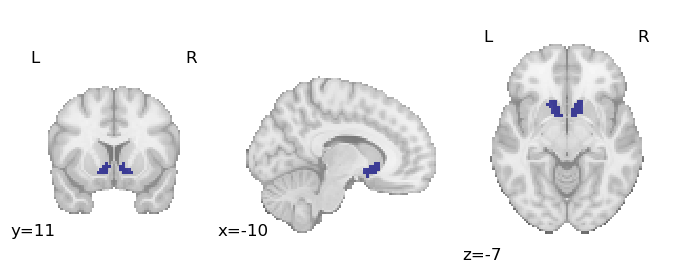

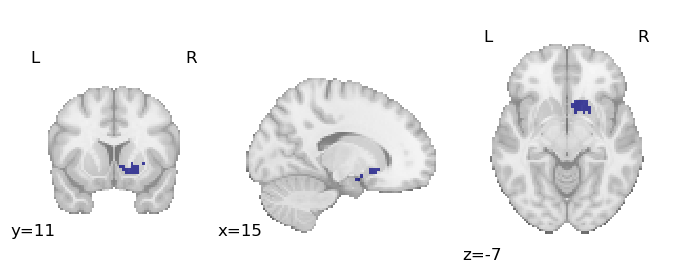

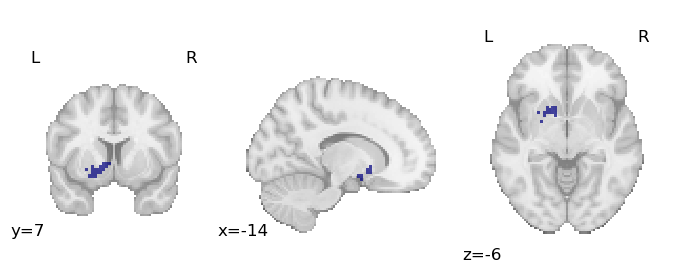

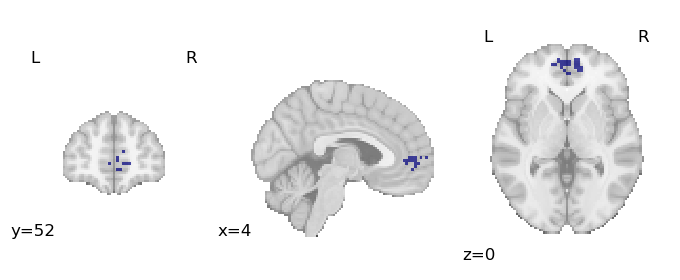

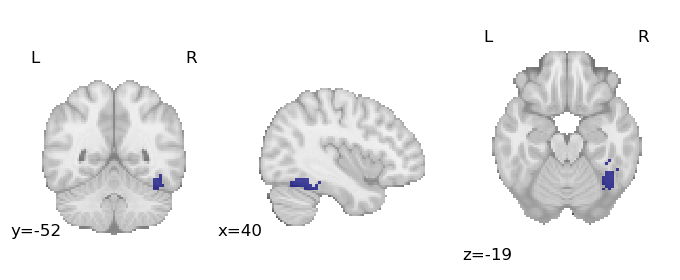

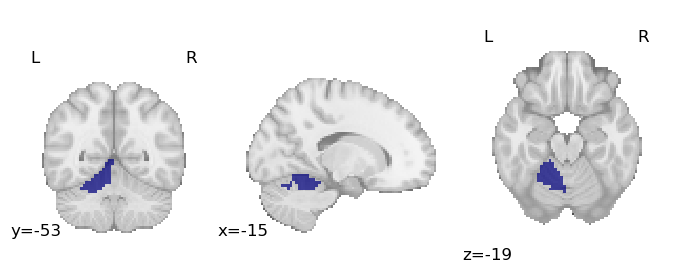

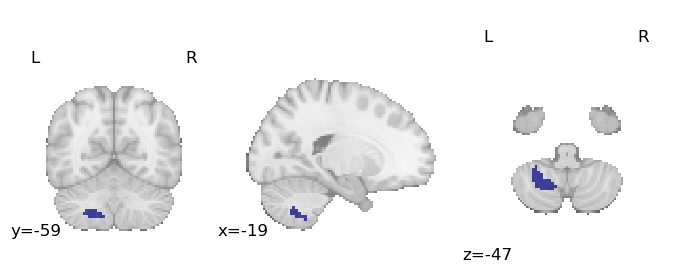

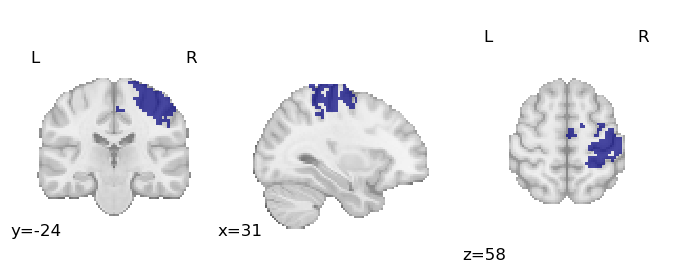

In [4]:
from nilearn import  image
#Striatum Mask
if 1==1:
    VS_mask='../masks/ROI-VS_cname-prereg.nii.gz'
    rstr_mask='../masks/fROI-RVS_cname-RewVsPun_zstat-1.nii.gz'
    lstr_mask='../masks/fROI-LVS_cname-RewVsPun_zstat-1.nii.gz'
    pfc_mask='../masks/fROI-vmPFC_cname-RewVsPun_zstat-1.nii.gz'
    FFA_mask='../masks/fROI-FFA_cname-StrVsComp_zstat-1.nii.gz'
    sCerb_mask='../masks/fROI-sCerb_cname-LeftVsRight_zstat-1.nii.gz'
    iCerb_mask='../masks/fROI-iCerb_cname-LeftVsRight_zstat-1.nii.gz'
    motor_mask='../masks/fROI-Motor_cname-LeftVsRight_zstat-1.nii.gz'
    mask_list=[VS_mask,rstr_mask,lstr_mask,pfc_mask,FFA_mask,sCerb_mask,iCerb_mask,motor_mask]
    
    for mask in mask_list:
        str_mask=NiftiMasker(mask_img=mask)
        plotting.plot_roi(mask,draw_cross=False)
        plt.show()

In [7]:
re.search('fROI-(.*)_cname',mask_list[1]).group(1)

'RVS'

# Tsnr for funtional masks

In [56]:
flist=['../derivatives/tsnr/'+img for img in os.listdir(
    '../derivatives/tsnr/') if ('_tsnr' in img) &('mb' in img)]
display(flist)

['../derivatives/tsnr/sub-10054_acq-mb1me4_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10059_acq-mb1me4_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10043_acq-mb3me4_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10074_acq-mb3me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10074_acq-mb6me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10017_acq-mb1me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10186_acq-mb6me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10017_acq-mb6me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10108_acq-mb6me4_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10186_acq-mb1me4_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10043_acq-mb3me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10137_acq-mb3me4_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10059_acq-mb1me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10035_acq-mb6me4_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10154_acq-mb1me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10108_acq-mb6me1_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10125_acq-mb3me4_tsnr.nii.gz',
 '../derivatives/tsnr/sub-10080

In [57]:
data=[]
img_list=[]
for img in tqdm(flist):
    start = time.time()
    tsnr_img=img
    #print(img)
    sub=re.search('tsnr/sub-(.*?)_acq',img).group(1)
    me=int(re.search('_acq-mb[0-7]me(.*?)_',img).group(1))
    mb=int(re.search('_acq-mb(.*?)me',img).group(1))
    #sub=re.search('func/sub-(.*?)_task',img).group(1)
    #print('sub: %s Multiband: %s Multiecho: %s'%(sub,mb,me))
    #tsnr_img = image.math_img('img.mean(axis=3) / img.std(axis=3)', img=img)
    
    for mask in mask_list:
        nifti_masker = NiftiMasker(mask_img=mask)
        mask_name=re.search('ROI-(.*)_cname',mask).group(1)
        x=nifti_masker.fit_transform(tsnr_img)
        img=nifti_masker.inverse_transform(x)
        data.append([sub,mb,me,mask_name,np.mean(x.flatten())])

../derivatives/tsnr/sub-10054_acq-mb1me4_tsnr.nii.gz
sub: 10054 Multiband: 1 Multiecho: 4
../derivatives/tsnr/sub-10059_acq-mb1me4_tsnr.nii.gz
sub: 10059 Multiband: 1 Multiecho: 4
../derivatives/tsnr/sub-10043_acq-mb3me4_tsnr.nii.gz
sub: 10043 Multiband: 3 Multiecho: 4
../derivatives/tsnr/sub-10074_acq-mb3me1_tsnr.nii.gz
sub: 10074 Multiband: 3 Multiecho: 1
../derivatives/tsnr/sub-10074_acq-mb6me1_tsnr.nii.gz
sub: 10074 Multiband: 6 Multiecho: 1
../derivatives/tsnr/sub-10017_acq-mb1me1_tsnr.nii.gz
sub: 10017 Multiband: 1 Multiecho: 1
../derivatives/tsnr/sub-10186_acq-mb6me1_tsnr.nii.gz
sub: 10186 Multiband: 6 Multiecho: 1
../derivatives/tsnr/sub-10017_acq-mb6me1_tsnr.nii.gz
sub: 10017 Multiband: 6 Multiecho: 1
../derivatives/tsnr/sub-10108_acq-mb6me4_tsnr.nii.gz
sub: 10108 Multiband: 6 Multiecho: 4
../derivatives/tsnr/sub-10186_acq-mb1me4_tsnr.nii.gz
sub: 10186 Multiband: 1 Multiecho: 4
../derivatives/tsnr/sub-10043_acq-mb3me1_tsnr.nii.gz
sub: 10043 Multiband: 3 Multiecho: 1
../derivat

../derivatives/tsnr/sub-10054_acq-mb1me1_tsnr.nii.gz
sub: 10054 Multiband: 1 Multiecho: 1
../derivatives/tsnr/sub-10078_acq-mb1me1_tsnr.nii.gz
sub: 10078 Multiband: 1 Multiecho: 1
../derivatives/tsnr/sub-10108_acq-mb1me1_tsnr.nii.gz
sub: 10108 Multiband: 1 Multiecho: 1
../derivatives/tsnr/sub-10059_acq-mb3me4_tsnr.nii.gz
sub: 10059 Multiband: 3 Multiecho: 4
../derivatives/tsnr/sub-10221_acq-mb3me4_tsnr.nii.gz
sub: 10221 Multiband: 3 Multiecho: 4
../derivatives/tsnr/sub-10017_acq-mb6me4_tsnr.nii.gz
sub: 10017 Multiband: 6 Multiecho: 4
../derivatives/tsnr/sub-10074_acq-mb1me4_tsnr.nii.gz
sub: 10074 Multiband: 1 Multiecho: 4
../derivatives/tsnr/sub-10054_acq-mb3me4_tsnr.nii.gz
sub: 10054 Multiband: 3 Multiecho: 4
../derivatives/tsnr/sub-10078_acq-mb3me1_tsnr.nii.gz
sub: 10078 Multiband: 3 Multiecho: 1
../derivatives/tsnr/sub-10142_acq-mb6me4_tsnr.nii.gz
sub: 10142 Multiband: 6 Multiecho: 4
../derivatives/tsnr/sub-10080_acq-mb3me4_tsnr.nii.gz
sub: 10080 Multiband: 3 Multiecho: 4
../derivat

In [58]:
df=pd.DataFrame(data=data,columns=['sub','MB','ME','Region','TSNR'])
df.to_csv("TSNRinfo.tsv",sep="\t",index=False)


,sub,MB,ME,Region,TSNR
0,10054,1,4,VS,48.314011
1,10054,1,4,RVS,44.731045
2,10054,1,4,LVS,40.024799
3,10054,1,4,vmPFC,51.344505
4,10054,1,4,FFA,48.465836
...,...,...,...,...,...
859,10150,3,4,vmPFC,47.063240
860,10150,3,4,FFA,46.723392
861,10150,3,4,sCerb,46.644741
862,10150,3,4,iCerb,47.665825


VS


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: TSNR     
No. Observations: 108     Method:             REML     
No. Groups:       18      Scale:              16.4183  
Min. group size:  6       Log-Likelihood:     -325.3520
Max. group size:  6       Converged:          Yes      
Mean group size:  6.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    20.519    1.913 10.726 0.000 16.770 24.269
MB            0.755    0.369  2.048 0.041  0.032  1.478
ME            7.890    0.495 15.928 0.000  6.919  8.861
MB:ME        -1.193    0.126 -9.427 0.000 -1.440 -0.945
Group Var    28.328    2.875                           
=======================================================

"""

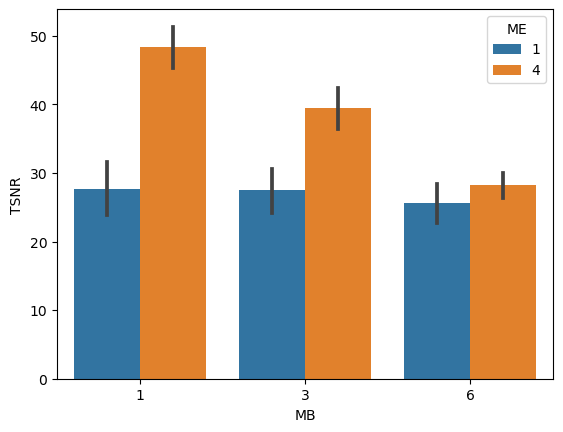

RVS


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: TSNR     
No. Observations: 108     Method:             REML     
No. Groups:       18      Scale:              6.0800   
Min. group size:  6       Log-Likelihood:     -279.3619
Max. group size:  6       Converged:          Yes      
Mean group size:  6.0                                  
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept   28.960    1.400  20.682 0.000 26.215 31.704
MB          -0.005    0.224  -0.022 0.983 -0.445  0.435
ME           4.683    0.301  15.535 0.000  4.092  5.274
MB:ME       -0.813    0.077 -10.561 0.000 -0.964 -0.662
Group Var   21.391    3.407                            
=======================================================

"""

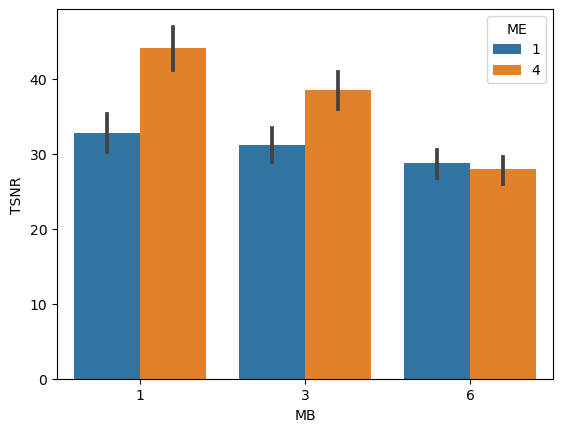

LVS


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: TSNR     
No. Observations: 108     Method:             REML     
No. Groups:       18      Scale:              8.4322   
Min. group size:  6       Log-Likelihood:     -289.9879
Max. group size:  6       Converged:          Yes      
Mean group size:  6.0                                  
-------------------------------------------------------
            Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept   24.623    1.345  18.313 0.000 21.988 27.259
MB           0.340    0.264   1.288 0.198 -0.178  0.858
ME           5.522    0.355  15.557 0.000  4.827  6.218
MB:ME       -0.932    0.091 -10.276 0.000 -1.109 -0.754
Group Var   13.262    1.894                            
=======================================================

"""

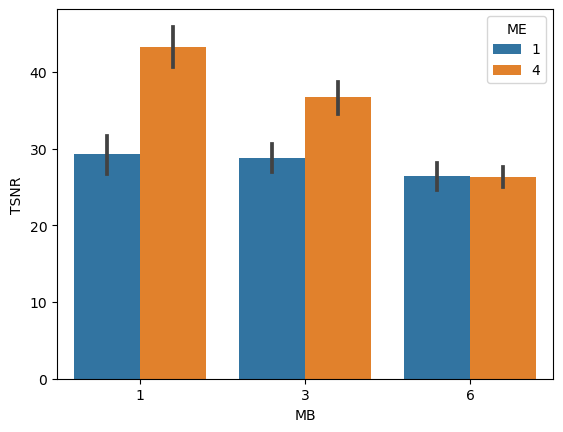

vmPFC


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: TSNR     
No. Observations: 108     Method:             REML     
No. Groups:       18      Scale:              39.7675  
Min. group size:  6       Log-Likelihood:     -365.5166
Max. group size:  6       Converged:          Yes      
Mean group size:  6.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    33.143    2.605 12.722 0.000 28.037 38.249
MB            0.101    0.574  0.176 0.860 -1.024  1.226
ME            4.894    0.771  6.348 0.000  3.383  6.405
MB:ME        -0.492    0.197 -2.499 0.012 -0.878 -0.106
Group Var    31.235    2.252                           
=======================================================

"""

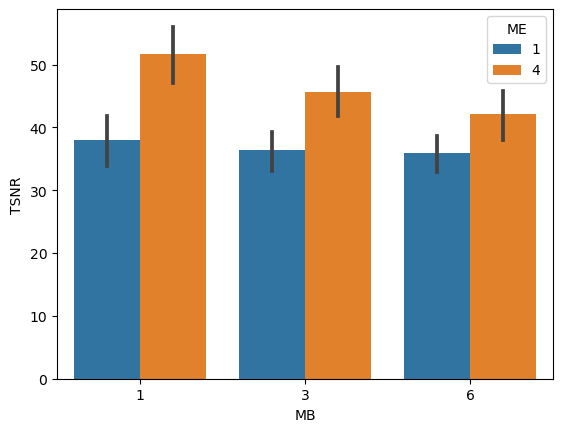

FFA


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: TSNR     
No. Observations: 108     Method:             REML     
No. Groups:       18      Scale:              46.0106  
Min. group size:  6       Log-Likelihood:     -374.2569
Max. group size:  6       Converged:          Yes      
Mean group size:  6.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    36.693    2.865 12.808 0.000 31.078 42.308
MB            0.342    0.617  0.553 0.580 -0.869  1.552
ME            5.006    0.829  6.037 0.000  3.381  6.632
MB:ME        -0.726    0.212 -3.430 0.001 -1.141 -0.311
Group Var    42.530    2.775                           
=======================================================

"""

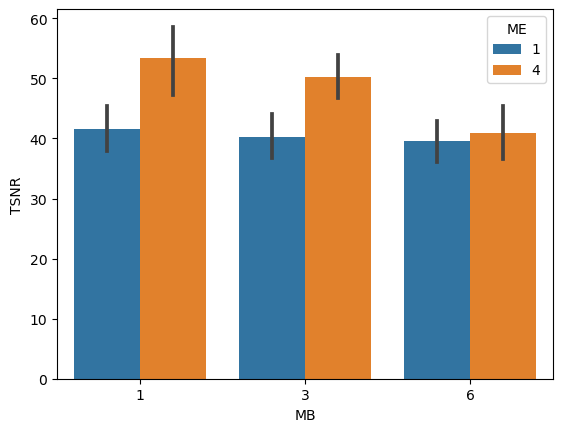

sCerb


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: TSNR     
No. Observations: 108     Method:             REML     
No. Groups:       18      Scale:              11.3526  
Min. group size:  6       Log-Likelihood:     -303.6405
Max. group size:  6       Converged:          Yes      
Mean group size:  6.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    40.605    1.491 27.230 0.000 37.682 43.527
MB            0.008    0.307  0.025 0.980 -0.593  0.609
ME            4.592    0.412 11.149 0.000  3.785  5.400
MB:ME        -0.786    0.105 -7.469 0.000 -0.992 -0.580
Group Var    14.066    1.776                           
=======================================================

"""

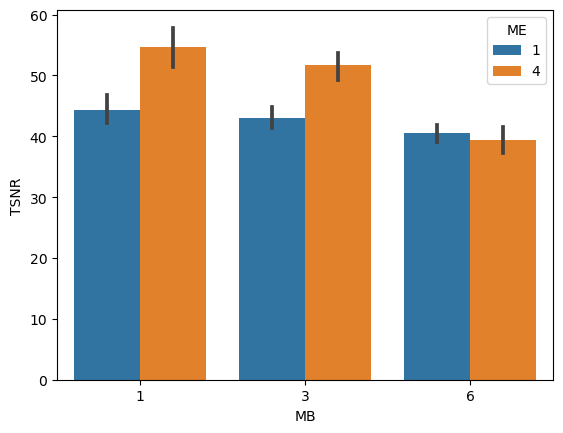

iCerb


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: TSNR     
No. Observations: 108     Method:             REML     
No. Groups:       18      Scale:              9.4782   
Min. group size:  6       Log-Likelihood:     -300.7121
Max. group size:  6       Converged:          Yes      
Mean group size:  6.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    38.379    1.643 23.365 0.000 35.159 41.598
MB            0.203    0.280  0.726 0.468 -0.346  0.753
ME            4.919    0.376 13.070 0.000  4.181  5.657
MB:ME        -0.691    0.096 -7.194 0.000 -0.880 -0.503
Group Var    26.891    3.468                           
=======================================================

"""

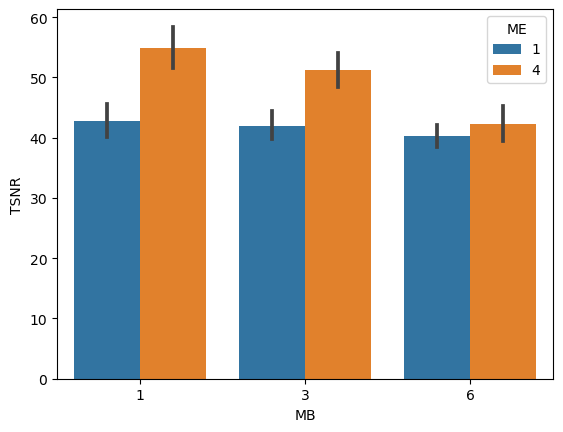

Motor


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: TSNR     
No. Observations: 108     Method:             REML     
No. Groups:       18      Scale:              42.8139  
Min. group size:  6       Log-Likelihood:     -367.6280
Max. group size:  6       Converged:          Yes      
Mean group size:  6.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    44.896    2.625 17.103 0.000 39.751 50.041
MB            0.638    0.596  1.072 0.284 -0.529  1.806
ME            3.305    0.800  4.132 0.000  1.737  4.873
MB:ME        -0.706    0.204 -3.455 0.001 -1.106 -0.305
Group Var    26.134    1.907                           
=======================================================

"""

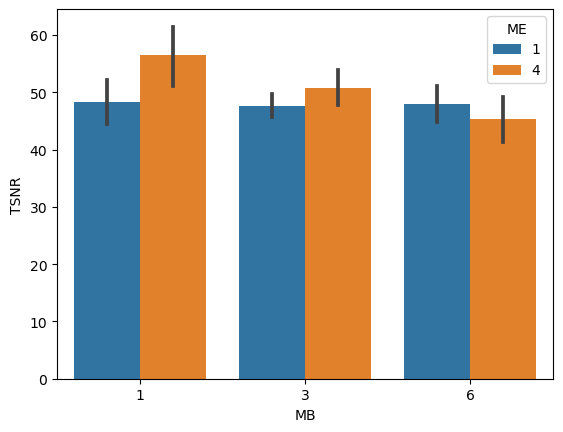

In [59]:
import matplotlib.pyplot as plt
#import statsmodels.api as sm
import statsmodels.formula.api as smf

df=pd.read_csv("TSNRinfo.tsv",sep='\t')
display(df)
for region in df['Region'].unique():
    print(region)
    plt_df=df[df['Region']==region]
    res=smf.mixedlm('TSNR ~ MB * ME',data=plt_df,groups=plt_df['sub']).fit()
    display(res.summary())
    sns.barplot(x='MB',y='TSNR',hue='ME',data=plt_df)
    plt.show()

In [28]:
f_list = [os.path.join(root,f) for root,dirs,files in os.walk(
    '../derivatives/fsl/') for f in files if any(
    substring in f for substring in ['zstat','cope']) & f.endswith('.nii.gz') ]#  ('stats' in root) &if ('/stats/zstat' in f) & (f.endswith('nii.gz'))]
display(f_list[0])
f_list=[f for f in f_list if ('stats/' in f) & ('L1_task' in f) &('type-act' in f)]
display(f_list)

'../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/cluster_mask_zstat16.nii.gz'

['../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/stats/varcope10.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/stats/varcope15.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/stats/zstat2.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/stats/cope4.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/stats/zstat14.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/stats/varcope13.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/stats/cope9.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/stats/cope12.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/stats/

# Reward:

In [42]:
contrasts=[5,6,8,10]
'cope' in f_list[0]
f_list=[f for f in f_list if ('cope' in f) or ('zstat' in f)]
f_list=[f for f in f_list if f.endswith(('11.nii.gz','12.nii.gz','13.nii.gz'))]
f_list

['../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/stats/varcope13.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/stats/cope12.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/stats/varcope11.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/stats/zstat11.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/stats/cope11.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/stats/varcope12.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/stats/zstat12.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/stats/zstat13.nii.gz',
 '../derivatives/fsl/sub-10154/L1_task-sharedreward_model-1_type-act_acq-mb6me1_sm-4.feat/st

In [43]:
data=[]
img_list=[]
from tqdm import tqdm

                                        
good_subs=['10017','10024','10035','10043',
          '10054','10059','10074','10078',
          '10080','10108','10125','10136',
          '10137','10142','10150','10154',
          '10186','10188','10221']
for img in tqdm(f_list):
    me=int(re.search('_acq-mb[0-7]me(.*?)_',img).group(1))
    mb=int(re.search('_acq-mb(.*?)me',img).group(1))
    sub=re.search('fsl/sub-(.*?)/L1',img).group(1)
    #print(sub,me,mb)
    if sub in good_subs:
        
        if 'zstat' in img:
            stat='zstat'
            contrast=int(re.search('zstat(.*).nii.gz',img).group(1))
            
        if 'cope' in img:
            contrast=int(re.search('cope(.*).nii.gz',img).group(1))
            stat='cope'
            if 'varcope' in img:
                stat='varcope'
        
        
        if contrast in[11,12,13]:

            if me>1:
                if '_denoise-' in img:
                    denoise=re.search('_denoise-(.*).feat',img).group(1)
                else:
                    denoise='none'
            else:
                denoise='none'
                
            if sub in good_subs:
                for mask in mask_list:
                    masker= NiftiMasker(mask_img=mask)
                    mask_name=re.search('ROI-(.*)_cname',mask).group(1)
                    x=masker.fit_transform(img)
                    #print(sub,mb,me,stat,contrast,mask_name)
                    data.append([sub,mb,me,stat,contrast,denoise,mask_name,np.mean(x.flatten()),np.median(x.flatten())])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1890/1890 [27:51<00:00,  1.13it/s]


In [44]:
df=pd.DataFrame(data=data,columns=['sub','MB','ME','stat','contrast','denoise','mask_name','mean_act','median_act'])
df.to_csv("activation.tsv",sep="\t",index=False)
display(df.head())
for column in df.columns:
    print(column, df[column].unique())

,sub,MB,ME,stat,contrast,denoise,mask_name,mean_act,median_act
0,10154,6,1,varcope,13,none,VS,32992.699219,33648.199219
1,10154,6,1,varcope,13,none,RVS,57911.757812,31736.849609
2,10154,6,1,varcope,13,none,LVS,41510.503906,35280.601562
3,10154,6,1,varcope,13,none,vmPFC,26315.046875,23796.769531
4,10154,6,1,varcope,13,none,FFA,36302.781250,22410.378906


sub ['10154' '10142' '10108' '10188' '10186' '10035' '10074' '10043' '10078'
 '10017' '10080' '10221' '10054' '10125' '10024']
MB [6 1 3]
ME [1 4]
stat ['varcope' 'cope' 'zstat']
contrast [13 12 11]
denoise ['none']
mask_name ['VS' 'RVS' 'LVS' 'vmPFC' 'FFA' 'sCerb' 'iCerb' 'Motor']
mean_act [32992.7     57911.758   41510.504   ...   323.87326   504.16776
   180.96521]
median_act [33648.2     31736.85    35280.6     ...   341.91617   535.9754
   154.29549]


,sub,MB,ME,stat,contrast,denoise,mask_name,mean_act,median_act
0,10154,6,1,varcope,13,none,VS,32992.700,33648.200
1,10154,6,1,varcope,13,none,RVS,57911.758,31736.850
2,10154,6,1,varcope,13,none,LVS,41510.504,35280.600
3,10154,6,1,varcope,13,none,vmPFC,26315.047,23796.770
4,10154,6,1,varcope,13,none,FFA,36302.780,22410.379


sub values are:  [10154 10142 10108 10188 10186 10035 10074 10043 10078 10017 10080 10221
 10054 10125 10024]
MB values are:  [6 1 3]
ME values are:  [1 4]
stat values are:  ['varcope' 'cope' 'zstat']
contrast values are:  [13 12 11]
denoise values are:  ['none']
mask_name values are:  ['VS' 'RVS' 'LVS' 'vmPFC' 'FFA' 'sCerb' 'iCerb' 'Motor']
mean_act values are:  [32992.7     57911.758   41510.504   ...   323.87326   504.16776
   180.96521]
median_act values are:  [33648.2     31736.85    35280.6     ...   341.91617   535.9754
   154.29549]
acq values are:  ['61' '11' '64' '34' '14' '31']
ME+denoise values are:  ['1_none' '4_none']
condition values are:  ['Rew>Pun' 'Left>Right' 'STR>Comp']
Motor varcope


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
=====================================================================
Model:                MixedLM   Dependent Variable:   mean_act       
No. Observations:     89        Method:               REML           
No. Groups:           15        Scale:                5823977422.0072
Min. group size:      5         Log-Likelihood:       -1095.1908     
Max. group size:      6         Converged:            Yes            
Mean group size:      5.9                                            
---------------------------------------------------------------------
              Coef.       Std.Err.   z    P>|z|   [0.025     0.975]  
---------------------------------------------------------------------
Intercept      99219.573 32083.587  3.093 0.002  36336.898 162102.247
MB            -13840.110  7611.662 -1.818 0.069 -28758.695   1078.474
ME             18667.947 10249.733  1.821 0.069  -1421.160  38757.055
MB:ME          -2466.228  2610.375 -0.945 0.345  -7582.469   2650.013
Group Var 1976791439.066 16330.049                                   
=====================================================================

"""

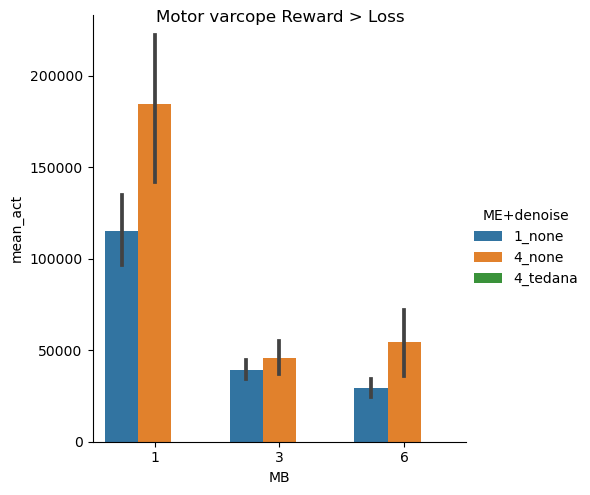

Motor cope


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: mean_act  
No. Observations: 89      Method:             REML      
No. Groups:       15      Scale:              15724.6599
Min. group size:  5       Log-Likelihood:     -548.1277 
Max. group size:  6       Converged:          Yes       
Mean group size:  5.9                                   
--------------------------------------------------------
           Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  199.046   51.367  3.875 0.000  98.368 299.723
MB           2.261   12.507  0.181 0.857 -22.252  26.774
ME          10.919   16.839  0.648 0.517 -22.085  43.923
MB:ME       -1.646    4.289 -0.384 0.701 -10.052   6.761
Group Var 3251.877   19.374                             
========================================================

"""

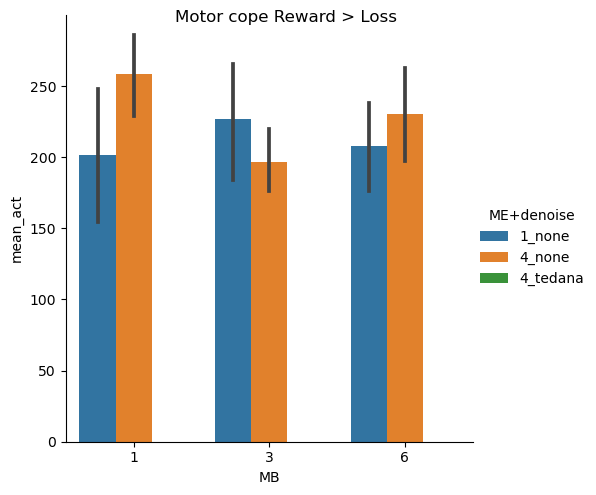

Motor zstat


<class 'statsmodels.iolib.summary2.Summary'>
"""
        Mixed Linear Model Regression Results
======================================================
Model:            MixedLM Dependent Variable: mean_act
No. Observations: 89      Method:             REML    
No. Groups:       15      Scale:              0.2711  
Min. group size:  5       Log-Likelihood:     -87.5219
Max. group size:  6       Converged:          Yes     
Mean group size:  5.9                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.529    0.232  2.281 0.023  0.074  0.983
MB           0.169    0.052  3.262 0.001  0.068  0.271
ME           0.043    0.070  0.620 0.535 -0.094  0.180
MB:ME       -0.021    0.018 -1.191 0.234 -0.056  0.014
Group Var    0.179    0.179                           
======================================================

"""

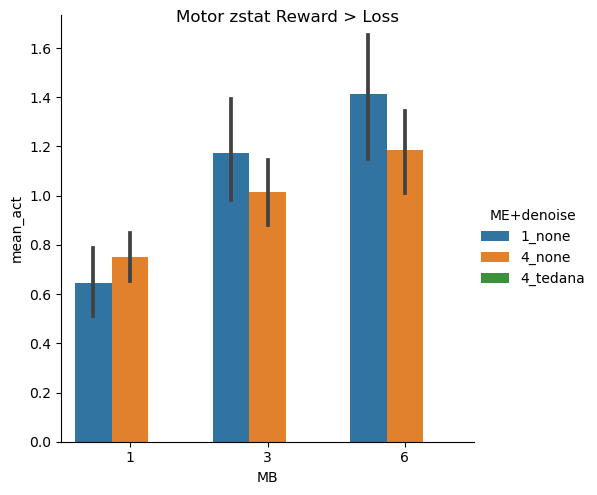

sCerb varcope


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
=====================================================================
Model:               MixedLM   Dependent Variable:   mean_act        
No. Observations:    89        Method:               REML            
No. Groups:          15        Scale:                20773244508.0026
Min. group size:     5         Log-Likelihood:       -1149.4326      
Max. group size:     6         Converged:            Yes             
Mean group size:     5.9                                             
---------------------------------------------------------------------
              Coef.       Std.Err.   z    P>|z|   [0.025     0.975]  
---------------------------------------------------------------------
Intercept     262180.600 60763.393  4.315 0.000 143086.537 381274.662
MB            -40244.089 14375.561 -2.799 0.005 -68419.672 -12068.507
ME             13823.035 19358.917  0.714 0.475 -24119.746  51765.816
MB:ME            897.450  4929.999  0.182 0.856  -8765.170  10560.070
Group Var 7349537243.107 32018.545                                   
=====================================================================

"""

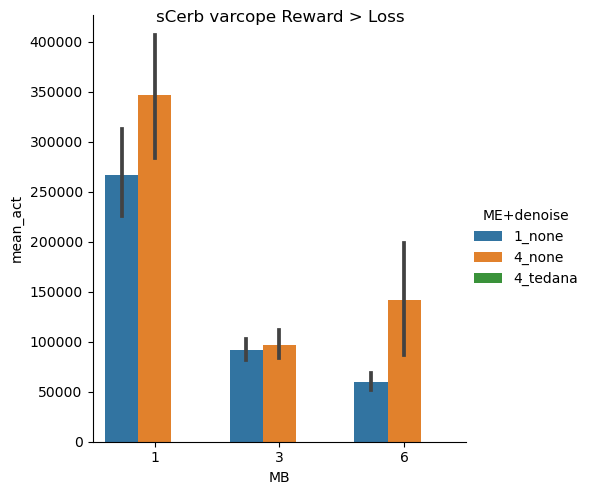

sCerb cope


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: mean_act  
No. Observations: 89      Method:             REML      
No. Groups:       15      Scale:              27504.7323
Min. group size:  5       Log-Likelihood:     -573.6762 
Max. group size:  6       Converged:          Yes       
Mean group size:  5.9                                   
--------------------------------------------------------
           Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept  209.395   69.398  3.017 0.003  73.377 345.412
MB           4.521   16.541  0.273 0.785 -27.899  36.942
ME          26.319   22.271  1.182 0.237 -17.332  69.970
MB:ME       -3.125    5.673 -0.551 0.582 -14.243   7.993
Group Var 8689.426   33.098                             
========================================================

"""

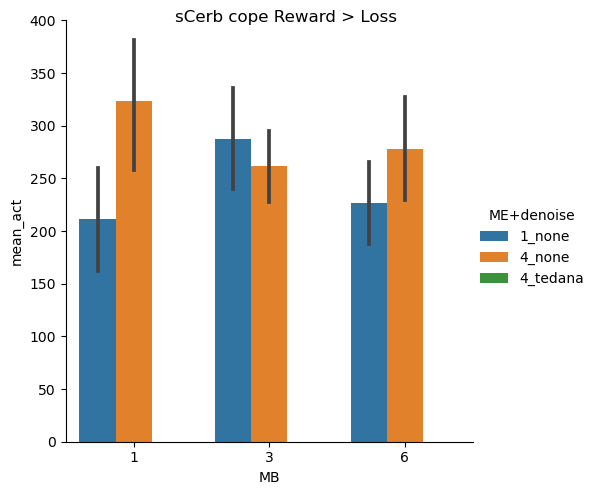

sCerb zstat


<class 'statsmodels.iolib.summary2.Summary'>
"""
        Mixed Linear Model Regression Results
======================================================
Model:            MixedLM Dependent Variable: mean_act
No. Observations: 89      Method:             REML    
No. Groups:       15      Scale:              0.1945  
Min. group size:  5       Log-Likelihood:     -69.9605
Max. group size:  6       Converged:          Yes     
Mean group size:  5.9                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.310    0.185  1.675 0.094 -0.053  0.674
MB           0.152    0.044  3.455 0.001  0.066  0.238
ME           0.080    0.059  1.348 0.178 -0.036  0.196
MB:ME       -0.023    0.015 -1.527 0.127 -0.053  0.007
Group Var    0.066    0.093                           
======================================================

"""

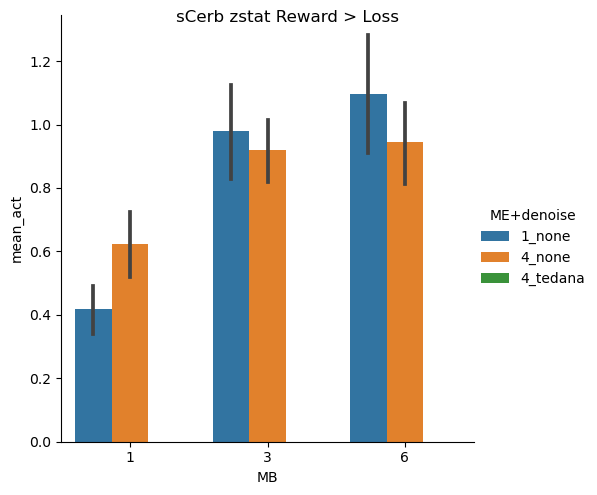

iCerb varcope


<class 'statsmodels.iolib.summary2.Summary'>
"""
                Mixed Linear Model Regression Results
=====================================================================
Model:                MixedLM   Dependent Variable:   mean_act       
No. Observations:     89        Method:               REML           
No. Groups:           15        Scale:                7545786494.9810
Min. group size:      5         Log-Likelihood:       -1107.2502     
Max. group size:      6         Converged:            Yes            
Mean group size:      5.9                                            
---------------------------------------------------------------------
              Coef.       Std.Err.   z    P>|z|   [0.025     0.975]  
---------------------------------------------------------------------
Intercept     207112.849 37080.274  5.586 0.000 134436.847 279788.851
MB            -31344.069  8664.030 -3.618 0.000 -48325.256 -14362.881
ME               828.208 11666.418  0.071 0.943 -22037.551  23693.966
MB:ME           1439.867  2971.285  0.485 0.628  -4383.744   7263.478
Group Var 3182883602.277 21377.387                                   
=====================================================================

"""

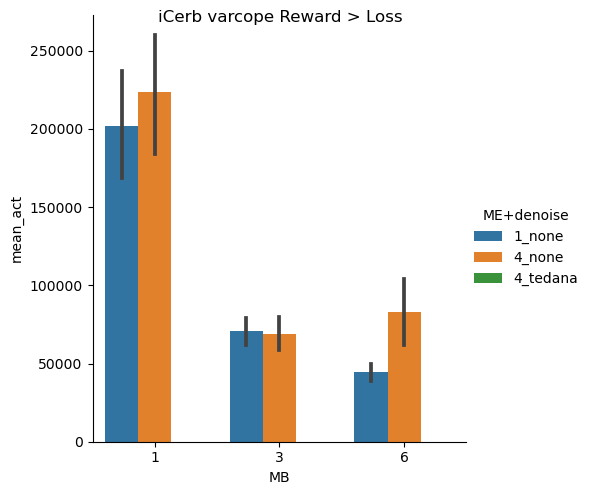

iCerb cope


<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: mean_act  
No. Observations: 89      Method:             REML      
No. Groups:       15      Scale:              26726.6962
Min. group size:  5       Log-Likelihood:     -566.2762 
Max. group size:  6       Converged:          Yes       
Mean group size:  5.9                                   
--------------------------------------------------------
             Coef.  Std.Err.   z   P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept   129.281   64.575 2.002 0.045   2.716 255.846
MB            5.272   16.305 0.323 0.746 -26.685  37.230
ME            3.967   21.949 0.181 0.857 -39.053  46.986
MB:ME         2.231    5.592 0.399 0.690  -8.729  13.191
Group Var   847.886   13.398                            
========================================================

"""

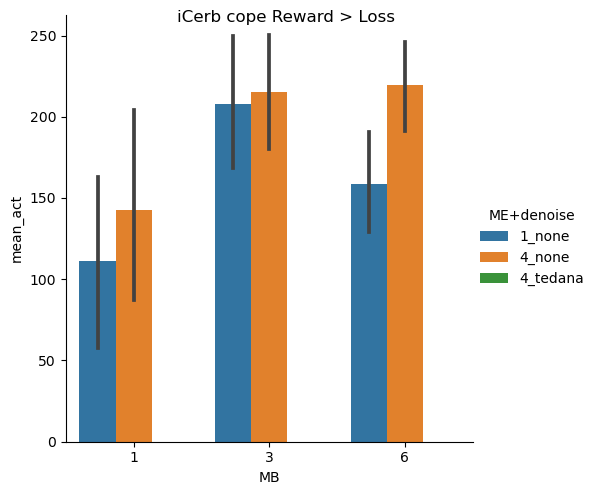

iCerb zstat


<class 'statsmodels.iolib.summary2.Summary'>
"""
        Mixed Linear Model Regression Results
======================================================
Model:            MixedLM Dependent Variable: mean_act
No. Observations: 89      Method:             REML    
No. Groups:       15      Scale:              0.2508  
Min. group size:  5       Log-Likelihood:     -76.5530
Max. group size:  6       Converged:          No      
Mean group size:  5.9                                 
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.149    0.201  0.742 0.458 -0.245  0.543
MB           0.136    0.050  2.721 0.007  0.038  0.234
ME           0.050    0.067  0.746 0.456 -0.082  0.182
MB:ME       -0.009    0.017 -0.535 0.593 -0.043  0.024
Group Var    0.027    0.061                           
======================================================

"""

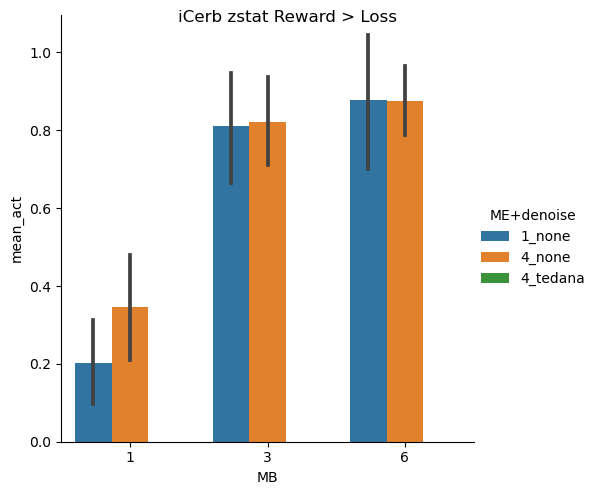

In [62]:

df=pd.read_csv("activation.tsv",sep="\t")
display(df.head())

df['acq']=df["MB"].astype(str) + df["ME"].astype(str)
df['ME+denoise']=df['ME'].astype(str)+'_'+df['denoise']
df['condition'] = df['contrast'].replace({5:'Computer Punishment',
                                          7:'Computer Reward',
                                          8:'Stranger Punishment',
                                          10:'Stranger Reward',
                                          11:'STR>Comp',
                                          12:'Left>Right',
                                         13: "Rew>Pun",
                                         14:"RP>N",
                                         15:"R>N",
                                         16:"N>P"})
good_subs=[10017,10024,10035,10043,10054,10059,10074,10078,
          10080,10108,10125,10136,
          10137,10142,10150,10154,
          10186,10188,10221]
df=df[df['sub'].isin(good_subs)]
for column in df.columns:
    print("%s values are: "%(column),df[column].unique())

for mask in ['Motor','sCerb','iCerb']:
    for stat in df['stat'].unique():
        print(mask,stat)
        plt_df=df[(df['mask_name']==mask)&(df['stat']==stat)&(df['contrast']==12)].copy()
        res=smf.mixedlm('mean_act ~ MB * ME',data=plt_df,groups=plt_df['sub']).fit()
        display(res.summary())
        #sns.barplot(x='MB',y='mean_act',hue='acq-scrub',hue_order=['1_none','4_none','4_tedana'],data=plt_df)
        g=sns.catplot(x='MB',y='mean_act',hue='ME+denoise',hue_order=['1_none','4_none','4_tedana'],
                      kind='bar',data=plt_df,ci=68)
        g.fig.suptitle('%s %s Reward > Loss'%(mask,stat))

        plt.show()

In [ ]:
df

,sub,MB,ME,stat,contrast,denoise,mask_name,mean_act,median_act
0,10154,6,1,varcope,13,none,VS,32992.699219,33648.199219
1,10154,6,1,varcope,13,none,RVS,57911.757812,31736.849609
2,10154,6,1,varcope,13,none,LVS,41510.503906,35280.601562
3,10154,6,1,varcope,13,none,vmPFC,26315.046875,23796.769531
4,10154,6,1,varcope,13,none,FFA,36302.781250,22410.378906


,sub,MB,ME,stat,contrast,denoise,mask_name,mean_act,median_act,acq,ME+denoise,condition
0,10154,6,1,varcope,13,none,VS,32992.699219,33648.199219,61,1_none,Rew>Pun
1,10154,6,1,varcope,13,none,RVS,57911.757812,31736.849609,61,1_none,Rew>Pun
2,10154,6,1,varcope,13,none,LVS,41510.503906,35280.601562,61,1_none,Rew>Pun
3,10154,6,1,varcope,13,none,vmPFC,26315.046875,23796.769531,61,1_none,Rew>Pun
4,10154,6,1,varcope,13,none,FFA,36302.781250,22410.378906,61,1_none,Rew>Pun


Motor varcope


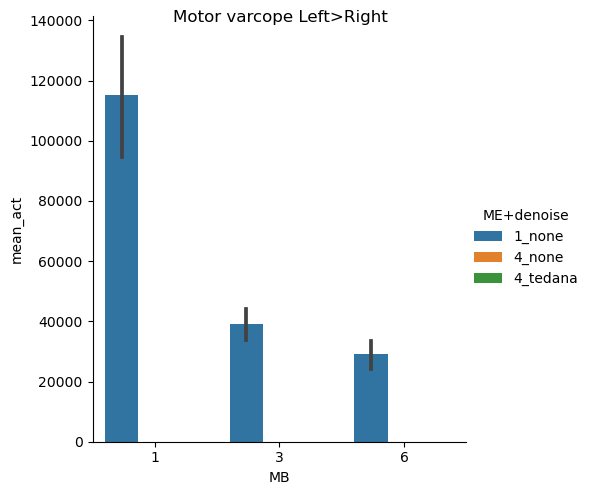

Motor cope


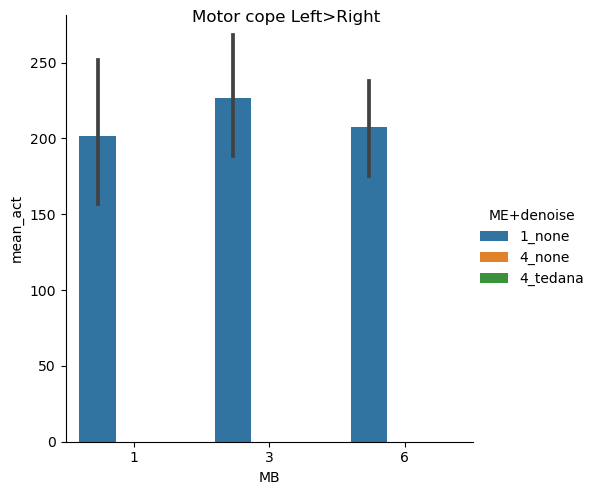

Motor zstat


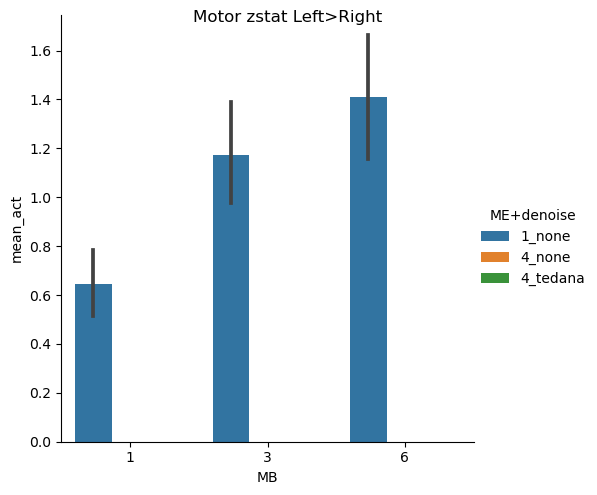

sCerb varcope


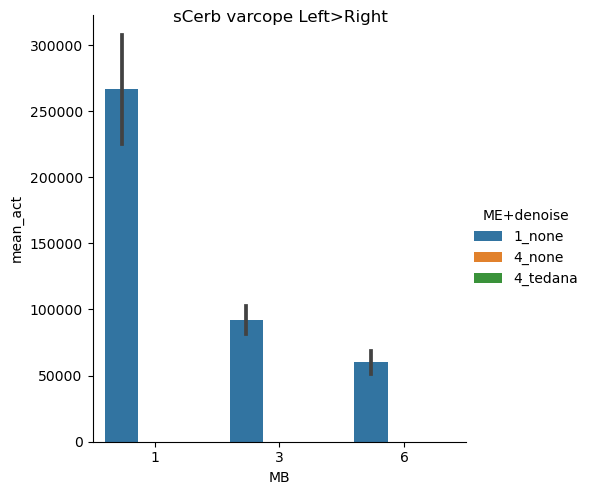

sCerb cope


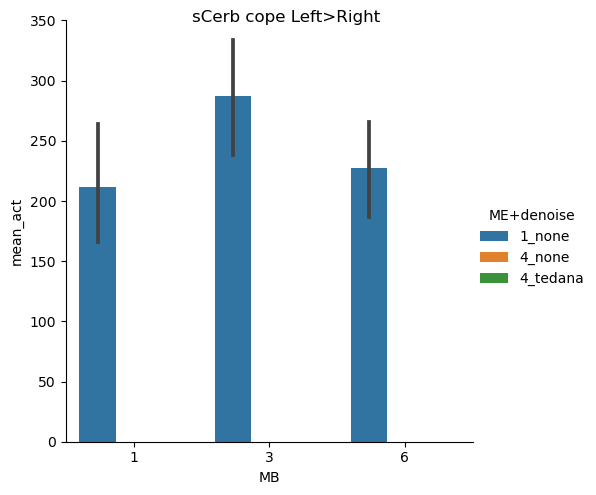

sCerb zstat


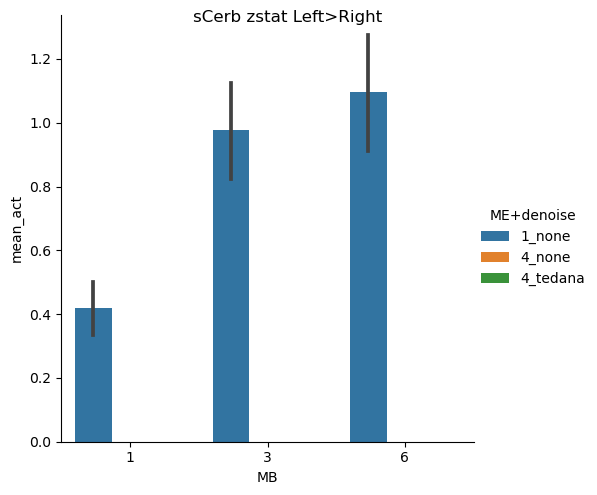

iCerb varcope


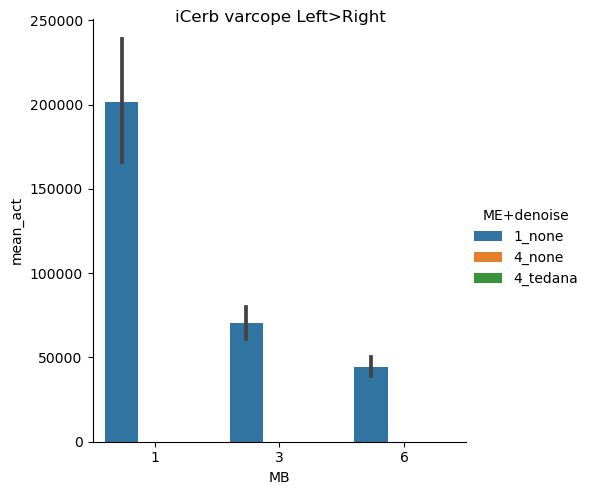

iCerb cope


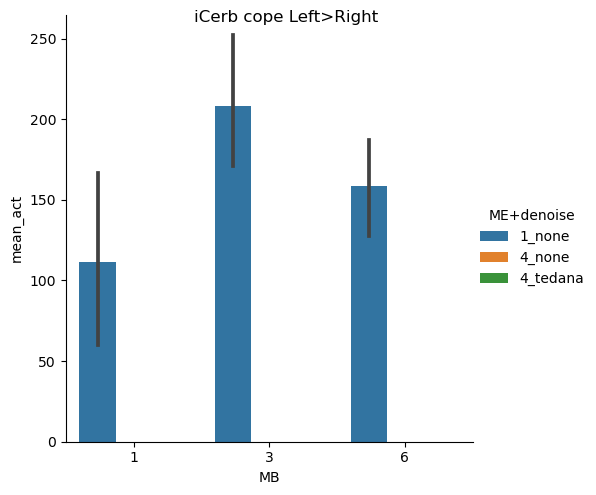

iCerb zstat


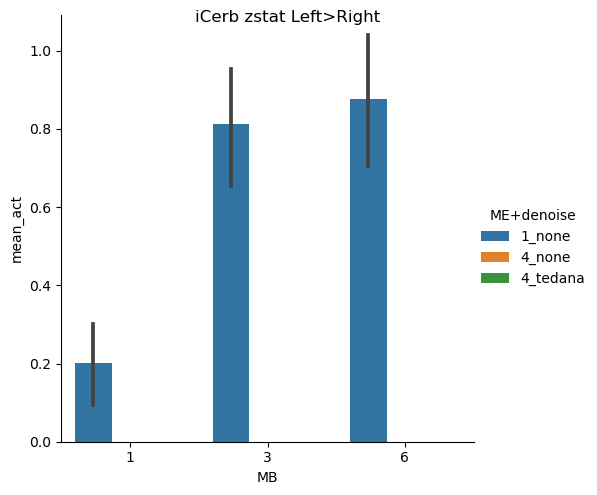

In [17]:
df=pd.DataFrame(data=data,columns=['sub','MB','ME','stat','contrast','denoise','mask_name','mean_act','median_act'])
df.to_csv("activation.tsv",sep="\t",index=False)
display(df.head())

df['acq']=df["MB"].astype(str) + df["ME"].astype(str)
df['ME+denoise']=df['ME'].astype(str)+'_'+df['denoise']
df['condition'] = df['contrast'].replace({5:'Computer Punishment',
                                          7:'Computer Reward',
                                          8:'Stranger Punishment',
                                          10:'Stranger Reward',
                                          11:'STR>Comp',
                                          12:'Left>Right',
                                         13: "Rew>Pun",
                                         14:"RP>N",
                                         15:"R>N",
                                         16:"N>P"})
good_subs=['10017','10024','10035','10043',
          '10054','10059','10074','10078',
          '10080','10108','10125','10136',
          '10137','10142','10150','10154',
          '10186','10188','10221']
display(df.head())

df=df[df['sub'].isin(good_subs)]

for mask in ['Motor','sCerb','iCerb']:
    for stat in df['stat'].unique():
        print(mask,stat)
        plt_df=df[(df['mask_name']==mask)&(df['stat']==stat)&(df['contrast']==12)].copy()
        #sns.barplot(x='MB',y='mean_act',hue='acq-scrub',hue_order=['1_none','4_none','4_tedana'],data=plt_df)
        g=sns.catplot(x='MB',y='mean_act',hue='ME+denoise',hue_order=['1_none','4_none','4_tedana'],
                      kind='bar',data=plt_df,ci=68)
        g.fig.suptitle('%s %s %s'%(mask,stat,plt_df['condition'].to_list()[0]))

        plt.show()

In [ ]:
plt_df['condition'].to_list()[0]

In [ ]:
plt_df[[plt_df['mask_name']=='VS']]


In [ ]:

df=pd.DataFrame(data=data,columns=['sub','MB','ME','Striatum','MPFC'])
df.to_csv("TSNRinfo.tsv",sep="\t",index=False)
df=df.melt(id_vars=['sub','MB','ME'],var_name='Region',value_name='TSNR')
display(df.head())
plt_df=df[df['Region']=='Striatum']

sns.barplot(x='MB',y='TSNR',hue='ME',data=plt_df)

In [ ]:
img_list


def collect_tsnr(img):
    start = time.time()

    me=int(re.search('_acq-mb[0-7]me(.*?)_',img).group(1))
    mb=int(re.search('_acq-mb(.*?)me',img).group(1))
    sub=re.search('func/sub-(.*?)_task',img).group(1)
    print(sub,mb,me)
    #mask = re.sub("desc-(.*?).nii.gz","desc-brain_mask.nii.gz",img)
    
    nifti_masker = NiftiMasker(mask_strategy='background')
    x=nifti_masker.fit_transform(img)
    img=nifti_masker.inverse_transform(x)
    end = time.time()
    print("first maskfit:",end - start)
    print(img.shape)
    
    
    # calculate mean image for the background
    from nilearn.image import math_img
    tsnr_img = image.math_img('img.mean(axis=3) / img.std(axis=3)', img=img)
    img_list=[tsnr_img,me,mb,sub]
    y=str_mask.fit_transform(tsnr_img)
    print("STR maskfit:",end - start)
    z=cort_mask.fit_transform(tsnr_img)
    print("CORT maskfit:",end - start)
    data_row=[sub,mb,me,np.mean(np.abs(x.flatten())),
                 np.mean(np.abs(y.flatten())),
                 np.mean(np.abs(z.flatten()))]
    return([img_list,data_row])

    end = time.time()
    print(end - start)

def driver_func(myfunc,input_list):
    THREADS=10
    with multiprocessing.Pool(THREADS) as pool:
        results=pool.map(myfunc,input_list)
    return(results)
data=driver_func(collect_tsnr,f_list)

for img in img_list:
    plotting.plot_stat_map(img[0],
                      title="tsnr for Sub: %s ME: %s MB: %s "%(img[3],img[1],img[2]),
                      vmax=200,draw_cross=False)
    plt.show()


## Plot tsnr Maps

In [ ]:
img=f_list[0]

#nifti_masker = NiftiMasker(mask_strategy='epi')
#x=nifti_masker.fit_transform(img)
#img=nifti_masker.inverse_transform(x)
tsnr_img = image.math_img('img.mean(axis=3) / img.std(axis=3)', img=img)
plotting.plot_stat_map(tsnr_img)

In [ ]:
sub='10017'
sub_list=[img for img in img_list if img[3]==sub]
display(sub_list)
for img in sub_list:
    plotting.plot_stat_map(img[0],title="tsnr for Sub: %s ME: %s MB: %s "%(img[3],img[1],img[2]),vmax=200,draw_cross=False)
    plt.show()

# L1 Z-stats


In [ ]:
f_list = [os.path.join(root,f) for root,dirs,files in os.walk(
    '../derivatives/fsl/') for f in files if ('zstat' in f) & f.endswith('.nii.gz') ]#  ('stats' in root) &if ('/stats/zstat' in f) & (f.endswith('nii.gz'))]
f_list=[f for f in f_list if ('stats/zstat' in f) & ('L1_task' in f) &('denoise-' in f)&('type-act' in f)]
display(f_list)

In [ ]:

def collect_zstats(img):
    zstat=int(re.search('thresh_zstat(.*).nii.gz',img).group(1))
    if zstat>10:
        me=int(re.search('_acq-mb[0-7]me(.*?)_',img).group(1))
        mb=int(re.search('_acq-mb(.*?)me',img).group(1))
        sub=re.search('fsl/sub-(.*?)/L1',img).group(1)
        mask = re.sub("desc-(.*?).nii.gz","desc-brain_mask.nii.gz",img)
        if mb>1:
            denoise=re.search('_denoise-9(.*).feat',img).group(1)
        else:
            denoise='none'

        nifti_masker = NiftiMasker(mask_strategy='background')
        x=nifti_masker.fit_transform(img)
        img=nifti_masker.inverse_transform(x)

        # calculate mean image for the background
    
        x=nifti_masker.fit_transform(img)
        y=str_mask.fit_transform(img)
        z=cort_mask.fit_transform(img)
        
        img_row=[str_mask.inverse_transform(y),img,zstat,me,mb,sub]

        data_row=[sub,mb,me,denoise,zstat,np.mean(np.abs(x.flatten())),
                     np.mean(np.abs(y.flatten())),
                     np.mean(np.abs(z.flatten()))]
        return(data_row)

def driver_func(myfunc,input_list):
    THREADS=4
    with multiprocessing.Pool(THREADS) as pool:
        data_res=[pool.apply_async(myfunc,p) for p in input_list]
        
res=driver_func(collect_zstats,f_list)
print(res)

In [ ]:
data=[]
img_list=[]
                                        
good_subs=['10017','10024','10035','10043',
          '10054','10059','10074','10078',
          '10080','10108','10125','10136',
          '10137','10142','10150','10154',
          '10186','10188','10221']
for img in f_list:    
    zstat=int(re.search('zstat(.*).nii.gz',img).group(1))
    if zstat in[5,6,7,8,9,10,13,14,15,16]:
        me=int(re.search('_acq-mb[0-7]me(.*?)_',img).group(1))
        mb=int(re.search('_acq-mb(.*?)me',img).group(1))
        sub=re.search('fsl/sub-(.*?)/L1',img).group(1)
        mask = re.sub("desc-(.*?).nii.gz","desc-brain_mask.nii.gz",img)
        if me>1:
            if '_denoise-' in img:
                denoise=re.search('_denoise-(.*).feat',img).group(1)
            else:
                continue
        else:
            denoise='none'
        if sub in good_subs:

            #mask = re.sub("desc-(.*?).nii.gz","desc-brain_mask.nii.gz",img)

            #nifti_masker = NiftiMasker(mask_strategy='background')
            x=cort_mask.fit_transform(img)

            # calculate mean image for the background

            #x=nifti_masker.fit_transform(img)
            #y=str_mask.fit_transform(img)
            z=str_mask.fit_transform(img)

            #img_list.append([str_mask.inverse_transform(y),img,zstat,me,mb,sub])

            data.append([sub,mb,me,zstat,denoise,np.mean(z.flatten()),np.mean(x.flatten())])

In [ ]:
df=pd.DataFrame(data=data,columns=['sub','MB','ME','contrast','denoise','Striatum','PFC'])
df=df.melt(id_vars=['contrast','sub','MB','ME','denoise'],var_name='Region',value_name='zstat')
df['acq']=df["MB"].astype(str) + df["ME"].astype(str)
df['acq-scrub']=df['ME'].astype(str)+df['denoise']
df['condition'] = df['contrast'].replace({5:'Computer Punishment',
                                          7:'Computer Reward',
                                          8:'Stranger Punishment',
                                          10:'Stranger Reward',
                                         13: "Rew>Pun",
                                         14:"RP>N",
                                         15:"R>N",
                                         16:"N>P"})
good_subs=['10017','10024','10035','10043',
          '10054','10059','10074','10078',
          '10080','10108','10125','10136',
          '10137','10142','10150','10154',
          '10186','10188','10221']
display(df.head())
df=df[df['condition'].isin(['Rew>Pun'])]
df=df[df['sub'].isin(good_subs)]
df=df[df['Region']=='Striatum']
display(df.head())
#df[['Player','Reward']] = df.condition.str.split(expand=True)
#plt_df=df[df['Region']=='Striatum']
#plt_df=plt_df[plt_df['Player']=='Stranger']

#plt_df=plt_df.groupby(by=['sub','acq']).mean().reset_index()

#display(plt_df.head())
df['ME+denoise']=df['ME'].astype(str)+'_'+df['denoise']
g=sns.catplot(x='MB',y='zstat',hue='ME+denoise',kind='bar',data=df,ci=95)
g.savefig('Rew-zstat.pdf')
#plt_df=plt_df[plt_df['Reward']=='Reward']
#g=sns.catplot(x='acq',y='zstat',hue='Player',kind='bar',data=plt_df,ci=85,
#              dodge=True,order=['11','14','31','34','61','64'])
#g.savefig('str-zstat.pdf')
#plt_df.head(13)

# Plotting Results from Whole Brain Anova

## Making masks

In [ ]:
from natsort import natsorted
sigfiles=[['_ppi','cope13.feat','zstat2']]

mask_file='../derivatives/fsl/L3_ANOVA_n19%s.gfeat/%s/cluster_mask_%s.nii.gz'%(
    sigfiles[0][0],sigfiles[0][1],sigfiles[0][2])
print(mask_file)

sig_mask=NiftiMasker(mask_img=mask_file)
plotting.plot_roi(sig_mask.mask_img,title="Cluster Mask", draw_cross=False)
plt.show()


In [ ]:
f_list = [os.path.join(root,f) for root,dirs,files in os.walk(
    '../derivatives/fsl/') for f in files if ('zstat' in f) & f.endswith('.nii.gz') ]
f_list=[f for f in f_list if ('stats/zstat' in f) & ('L1_task' in f) &('denoise-none' in f)&('type-ppi' in f)]
#display(f_list)

In [ ]:
data=[]
img_list=[]
                                        
good_subs=['10017','10024','10035','10043',
          '10054','10059','10074','10078',
          '10080','10108','10125','10136',
          '10137','10142','10150','10154',
          '10186','10188','10221']
for img in f_list:    
    zstat=int(re.search('zstat(.*).nii.gz',img).group(1))
    if zstat in[13]:
        me=int(re.search('_acq-mb[0-7]me(.*?)_',img).group(1))
        mb=int(re.search('_acq-mb(.*?)me',img).group(1))
        sub=re.search('fsl/sub-(.*?)/L1',img).group(1)
        mask = re.sub("desc-(.*?).nii.gz","desc-brain_mask.nii.gz",img)
        if me>1:
            if '_denoise-' in img:
                denoise=re.search('_denoise-(.*).feat',img).group(1)
            else:
                continue
        else:
            denoise='none'
        if sub in good_subs:

            x=sig_mask.fit_transform(img)
            
            data.append([sub,mb,me,zstat,denoise,np.mean(x.flatten())])

In [ ]:
df=pd.DataFrame(data=data,columns=['sub','MB','ME','contrast','denoise','VS-Cerb Connectivity'])
df['ME+denoise']=df['ME'].astype(str)+'_'+df['denoise']
g=sns.catplot(x='MB',y='VS-Cerb Connectivity',hue='ME',kind='bar',data=df,ci=95)
g.savefig('PPI_seed-VS_target-Cerb_contrast-Rew-Pun_cluster2.pdf')